# Bayesian Optimization & Supervised Machine Learning

## Overview
1. Load sonar all data
2. Prepared Data
3. Split data into training and testing datasets
4. Encode data for Xgboost (matrix)
5. Train ML models
6. Evaluate ML performance
7. Confusion Matrix
8. Save Model
9. Load Model
10. Predict on new data

In [7]:
# Import Libraries.

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Bayesian Optimization -bayes_opt
from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours

# # Bayesian Optimization - skopt
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer

# Udeståender:
Omkode skopt eksempel, så det anvender bayes_opt eller omvendt.

### Generate Synthetic binary classification dataset.

In [9]:
# Generate Synthetic binary classification dataset.
# Only needed if Sonar data is not loaded.
def get_data():
    data, targets = make_classification(
        n_samples=3000,
        n_features=25,
        n_informative=12,
        n_redundant=7,
        random_state=134985745,
    )
    return data, targets

data, targets = get_data()

data.shape
targets[0:10]

Out[123]: array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [10]:
##########################
# Load dataset fra min github
from pandas import read_csv
url = 'https://raw.githubusercontent.com/kurtholst/databricks_proj/master/sonar.all-data.csv'
dataset = read_csv(url, header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

In [11]:
# Split-out validation dataset i data og target klasse.
array = dataset.values
data = array[:,0:60].astype(float)
targets = array[:,60]

# For simplificering:
X=data
y=targets

#####################################
# Split i training og test dataset. #
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=122)
print("Labels for training and testing data")
print(train_y)
print(test_y)


Labels for training and testing data
['R' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'M'
 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'R'
 'R' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'M'
 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'M'
 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'M'
 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M']
['M' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R'
 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'M'
 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R'
 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M'
 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M'
 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'M']

In [12]:
###################### Support Vector Machine Classification ###########
def svc_cv(C, gamma, data, targets):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    estimator = SVC(C=C, gamma=gamma, random_state=2)
    cval = cross_val_score(estimator, data, targets, scoring='roc_auc', cv=4)
    return cval.mean()

def optimize_svc(data, targets):
    """Apply Bayesian Optimization to SVC parameters."""
    def svc_crossval(expC, expGamma):
        """Wrapper of SVC cross validation.
        Notice how we transform between regular and log scale. While this
        is not technically necessary, it greatly improves the performance
        of the optimizer.
        """
        C = 10 ** expC
        gamma = 10 ** expGamma
        return svc_cv(C=C, gamma=gamma, data=data, targets=targets)

    optimizer = BayesianOptimization(
        f=svc_crossval,
        pbounds={"expC": (-3, 2), "expGamma": (-4, -1)},
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)
    optimizer_max = optimizer.max
    return optimizer_max

In [13]:
# Optimizing Support Vector Machine
# Run bayesian optimization function with first batch of iterations
print(Colours.yellow("--- Optimizing SVM ---"))
optimize_svc(data, targets)


--- Optimizing SVM --- 
 iter | target | expC | expGamma |
-------------------------------------------------
 1 | 0.5711 | -2.042 | -2.134 |
 2 | 0.5745 | -0.8114 | -1.644 |
 3 | 0.5775 | 0.8999 | -3.182 |
 4 | 0.5741 | -1.618 | -1.594 |
 5 | 0.6701 | 1.791 | -1.372 |
 6 | 0.666 | 1.182 | -1.0 |
 7 | 0.6817 | 2.0 | -1.0 |
 8 | 0.6846 | 1.815 | -1.0 |
 9 | 0.5678 | -3.0 | -4.0 |
 10 | 0.6831 | 1.665 | -1.0 |
 11 | 0.5719 | -3.0 | -1.0 |
 12 | 0.5775 | 1.983 | -3.999 |
 13 | 0.6846 | 1.808 | -1.0 |
 14 | 0.6843 | 1.789 | -1.015 |
 15 | 0.6846 | 1.816 | -1.0 |
=================================================
Final result: {'target': 0.6846362433862434, 'params': {'expC': 1.8152995846389386, 'expGamma': -1.0}}
Out[127]: {'target': 0.6846362433862434,
 'params': {'expC': 1.8152995846389386, 'expGamma': -1.0}}

In [14]:
###################### Bayesian Optimization ###########
###################### Random Forest Classification ###########
def rfc_cv(n_estimators, min_samples_split, max_features, data, targets):
    """Random Forest cross validation.
    This function will instantiate a random forest classifier with parameters
    n_estimators, min_samples_split, and max_features. Combined with data and
    targets this will in turn be used to perform cross validation. The result
    of cross validation is returned.
    Our goal is to find combinations of n_estimators, min_samples_split, and
    max_features that minimzes the log loss.
    """
    estimator = RandomForestClassifier(
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=2
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='neg_log_loss', cv=4)
    return cval.mean()

def optimize_rfc(data, targets):
    """Apply Bayesian Optimization to Random Forest parameters."""
    def rfc_crossval(n_estimators, min_samples_split, max_features):
        """Wrapper of RandomForest cross validation.
        Notice how we ensure n_estimators and min_samples_split are casted
        to integer before we pass them along. Moreover, to avoid max_features
        taking values outside the (0, 1) range, we also ensure it is capped
        accordingly.
        """
        return rfc_cv(
            n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=max(min(max_features, 0.999), 1e-3),
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=rfc_crossval,
        pbounds={
            "n_estimators": (10, 250),
            "min_samples_split": (2, 25),
            "max_features": (2, 50),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)


    print("Final result:", optimizer.max)


In [15]:
# Random Forest Execute baysian optimization run
print(Colours.green("--- Optimizing Random Forest ---"))
optimize_rfc(data, targets)

--- Optimizing Random Forest --- 
 iter | target | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------
 1 | -0.6888 | 11.19 | 16.31 | 115.1 |
 2 | -0.7105 | 39.7 | 19.94 | 75.42 |
 3 | -0.697 | 15.27 | 20.44 | 240.0 |
 4 | -0.6818 | 44.04 | 10.23 | 130.2 |
 5 | -0.6939 | 34.81 | 18.39 | 98.86 |
 6 | -0.6904 | 30.72 | 25.0 | 143.7 |
 7 | -0.68 | 43.41 | 11.81 | 129.7 |
 8 | -0.6856 | 48.71 | 24.34 | 124.7 |
 9 | -0.6857 | 32.18 | 14.04 | 123.3 |
 10 | -0.6907 | 47.45 | 20.87 | 139.8 |
 11 | -0.6878 | 47.13 | 11.23 | 117.9 |
 12 | -0.6946 | 26.55 | 2.588 | 136.8 |
 13 | -0.6864 | 37.9 | 22.46 | 128.3 |
 14 | -1.655 | 2.181 | 2.166 | 11.22 |
 15 | -0.6985 | 50.0 | 2.0 | 250.0 |
=============================================================
Final result: {'target': -0.6800015605212528, 'params': {'max_features': 43.41398721317251, 'min_samples_split': 11.80501751583691, 'n_estimators': 129.70393186582265}}

In [16]:
# Train Random Forest with optimum parameters found during bayesian optimization
# Fiske optimale parametre ud af optimize_rfc
trainedforest = RandomForestClassifier(max_features = 44, 
                                       min_samples_split = 10, 
                                       n_estimators = 130) \
                    .fit(train_X, train_y)

trainedforest

Out[133]: RandomForestClassifier(max_features=44, min_samples_split=10, n_estimators=130)

In [17]:
# Plotting Learning Curve
# Create CV training and test scores for various training set sizes
from sklearn.model_selection import learning_curve

X = data
y = targets

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv = 10,
                                                        # Evaluation metric
                                                        scoring = 'accuracy',
                                                        # Use all computer cores
                                                        n_jobs = -1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



In [18]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = trainedforest.predict(test_X)

#train_X, test_X, train_y, test_y 
# Machine Learning Performance
print("Confusion Matrix")
print(confusion_matrix(y_true = test_y, y_pred = y_pred))


Confusion Matrix
[[46 13]
 [10 35]]

In [19]:
# Classification Report (ala caret)
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_true = test_y, y_pred = y_pred))


Classification Report
 precision recall f1-score support

 M 0.82 0.78 0.80 59
 R 0.73 0.78 0.75 45

 accuracy 0.78 104
 macro avg 0.78 0.78 0.78 104
weighted avg 0.78 0.78 0.78 104

In [20]:
# Accuracy
acc5 = accuracy_score(y_true = test_y, y_pred = y_pred)
print(acc5)

0.7788461538461539

In [21]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(test_y, y_pred))

0.7788461538461539

In [22]:
# store the predicted probabilities for class 1
classifier = trainedforest.fit(X, y)
predictions = classifier.predict_proba(test_X)
print(predictions)
#y_pred_prob = RFC.predict_proba(data)


[[0.97747253 0.02252747]
 [0.20607393 0.79392607]
 [0.76966089 0.23033911]
 [0.99230769 0.00769231]
 [0.87403456 0.12596544]
 [0.81013547 0.18986453]
 [0.88724459 0.11275541]
 [0.10766789 0.89233211]
 [0.94168498 0.05831502]
 [0.1319951 0.8680049 ]
 [0.6816459 0.3183541 ]
 [0.86142829 0.13857171]
 [0.37083858 0.62916142]
 [0.05603064 0.94396936]
 [0.06758624 0.93241376]
 [0.99134615 0.00865385]
 [0.3062552 0.6937448 ]
 [0.23967446 0.76032554]
 [0.92555906 0.07444094]
 [0.06700855 0.93299145]
 [0.95328683 0.04671317]
 [0.02615385 0.97384615]
 [0.1860459 0.8139541 ]
 [0.86976263 0.13023737]
 [0.04003663 0.95996337]
 [0.27976 0.72024 ]
 [0.78330328 0.21669672]
 [0.8775431 0.1224569 ]
 [0.27202229 0.72797771]
 [0.21840792 0.78159208]
 [0.01666667 0.98333333]
 [0.24763368 0.75236632]
 [0.87604312 0.12395688]
 [0.95076923 0.04923077]
 [0.29790335 0.70209665]
 [0.89255245 0.10744755]
 [0.93214286 0.06785714]
 [0.97948718 0.02051282]
 [0.82421318 0.17578682]
 [0.11367466 0.88632534]
 [0.20748235 0.79251765]
 [0.8605411 0.1394589 ]
 [0.80887 0.19113 ]
 [0.97211538 0.02788462]
 [0.63845879 0.36154121]
 [0.88849975 0.11150025]
 [0.76536626 0.23463374]
 [0.97390649 0.02609351]
 [0.8463943 0.1536057 ]
 [0.16448754 0.83551246]
 [0.20600998 0.79399002]
 [0.01263736 0.98736264]
 [0.01546703 0.98453297]
 [0.07902015 0.92097985]
 [0.81177259 0.18822741]
 [0.02115385 0.97884615]
 [0.93025641 0.06974359]
 [0.02400641 0.97599359]
 [0.72870505 0.27129495]
 [0.10415803 0.89584197]
 [0.34987081 0.65012919]
 [0.92016412 0.07983588]
 [0.92035503 0.07964497]
 [0.94205308 0.05794692]
 [0.89662034 0.10337966]
 [0.22104812 0.77895188]
 [0.73047372 0.26952628]
 [0.35348729 0.64651271]
 [0.23604481 0.76395519]
 [0.25891877 0.74108123]
 [0.92805861 0.07194139]
 [0.76087591 0.23912409]
 [0.13167126 0.86832874]
 [0.03619048 0.96380952]
 [0.90324974 0.09675026]
 [0.94015207 0.05984793]
 [0.82362936 0.17637064]
 [0.25985867 0.74014133]
 [0.94358974 0.05641026]
 [0.9069553 0.0930447 ]
 [0.07370338 0.92629662]
 [0.09601689 0.90398311]
 [0.74474553 0.25525447]
 [0.88955903 0.11044097]
 [0.65582761 0.34417239]
 [0.90444706 0.09555294]
 [0.97432012 0.02567988]
 [0.97692308 0.02307692]
 [0.29447432 0.70552568]
 [0.86027741 0.13972259]
 [0.25303967 0.74696033]
 [0.57429186 0.42570814]
 [0.02282051 0.97717949]
 [0.08839702 0.91160298]
 [0.8047489 0.1952511 ]
 [0.75148485 0.24851515]
 [0.97769372 0.02230628]
 [0.87262201 0.12737799]
 [0.02307692 0.97692308]
 [0.91656314 0.08343686]
 [0.20612561 0.79387439]
 [0.00671192 0.99328808]
 [0.88832637 0.11167363]
 [0.96865634 0.03134366]]

In [23]:
# RoC-Curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(test_y, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

File "<command-163357335389645>" , line 9 
 fpr, tpr, thresholds = metrics.roc_curve(test_y, predictions[[,1]]) 
 ^
 SyntaxError : invalid syntax

#### Gradient Boosting - xgboost

In [25]:
# Encoding for Xgboost
from sklearn import preprocessing
import xgboost as xgb

le=preprocessing.LabelEncoder()
labels = targets

le.fit(labels)
dataset['categorical_label']=le.transform(labels)

labels=dataset['categorical_label']


#Converting the dataframe into XGBoost’s Dmatrix object
dtrain=xgb.DMatrix(data, label=labels)

print(dtrain.feature_names)
print(dtrain.get_label())


['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59']
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

In [26]:
#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators, learning_rate):
  params= {'max_depth': int(max_depth),
            'gamma': gamma,
            #'booster': 'gbtree',
            #'n_estimators': int(n_estimators),
            #'early_stopping_rounds': 10,
            'learning_rate':learning_rate,
            'subsample': 0.8,
            'eta': 0.1,
            #'eps': 1,
            'colsample_bytree': 0.3, 
            'random_state':0, 
            'seed': 1234,
            'missing':None,
            #'sample_type': 'uniform',
            #'normalize_type': 'tree',
            #'rate_drop': 0.1,
            'objective': 'binary:logistic',
            #'objective': 'binary:hinge',
            #'metric': 'binary_logloss'}
            #'objective':'multi:softprob',  # Multiclass
            'eval_metric': 'logloss'} # 'eval_metric': 'mlogloss' ved flere klasser

# Cross validating with the specified parameters in 5 folds and 70 iterations
  cv_result = xgb.cv(params = params, 
                     dtrain = dtrain, 
                     num_boost_round = 70, 
                     nfold = 5, 
                     early_stopping_rounds = 10 , 
                     as_pandas = True)  # we will get the result as a pandas DataFrame.

# Return the log_loss
  return -1.0 * cv_result['train-logloss-mean'].iloc[-1] #


#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                            'gamma': (0, 1),
                                            'learning_rate':(0.01, 1),
                                            'n_estimators':(100, 200)})




In [27]:
# Performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ucb') # Acquisition function. ucb = Upper Confidence Bound. Other alternatives: ei


| iter | target | gamma | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
 1 | -0.05305 | 0.4052 | 0.2681 | 6.063 | 129.4 |
 2 | -0.03717 | 0.212 | 0.4 | 3.351 | 144.0 |
 3 | -0.07534 | 0.7417 | 0.6221 | 8.857 | 184.9 |
 4 | -0.04038 | 0.2474 | 0.334 | 9.347 | 116.4 |
 5 | -0.08131 | 0.6193 | 0.1007 | 3.379 | 118.6 |
 6 | -0.03675 | 0.4253 | 0.719 | 6.88 | 136.7 |
 7 | -0.03286 | 0.3647 | 0.7458 | 7.06 | 173.8 |
 8 | -0.06472 | 0.4422 | 0.1032 | 8.312 | 172.7 |
 9 | -0.0276 | 0.3276 | 0.7556 | 6.95 | 136.6 |
 10 | -0.03788 | 0.5845 | 0.7649 | 6.855 | 136.6 |
 11 | -0.05864 | 0.7012 | 0.2929 | 7.203 | 110.5 |
 12 | -0.03023 | 0.1439 | 0.5902 | 7.518 | 171.0 |
 13 | -0.0242 | 0.06463 | 0.9634 | 7.373 | 136.9 |
=========================================================================

In [28]:
print("Final result - optimal parameters:", xgb_bo.max)
print("params: ", xgb_bo.max['params'])

params_xgb={'gamma':int(xgb_bo.max['params'].get('gamma')),
  'learning_rate':int(xgb_bo.max['params'].get('learning_rate'))
  #'max_dept':int(xgb_bo.max['params'].get('max_depth')),
  #'n_estimators':int(xgb_bo.max['params'].get('n_estimators'))
          }
params_xgb

Final result - optimal parameters: {'target': -0.0241956, 'params': {'gamma': 0.06462662498727212, 'learning_rate': 0.9634414105930078, 'max_depth': 7.372771796451763, 'n_estimators': 136.9119895327785}}
params: {'gamma': 0.06462662498727212, 'learning_rate': 0.9634414105930078, 'max_depth': 7.372771796451763, 'n_estimators': 136.9119895327785}
Out[148]: {'gamma': 0, 'learning_rate': 0}

In [29]:
# Train model with found parameters
model = xgb.train(params=params_xgb, 
                  dtrain=dtrain,
        verbose_eval=10)


In [30]:
# Performance on testdataset.
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(dtrain) # Bedre med opsplitning af train og test.
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(labels, best_preds, average='macro')))
print("Recall = {}".format(recall_score(labels, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(labels, best_preds)))



/databricks/python/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 _warn_prf(average, modifier, msg_start, len(result))
Precision = 0.2668269230769231
Recall = 0.5
Accuracy = 0.5336538461538461

#### Confusion Matrix
#### ROC-Curve
#### Save og Load model
#### Predict på "nye data"

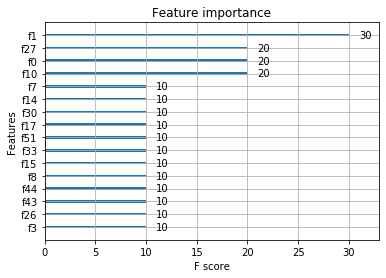

In [33]:
# Feature Importance
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
xgb.plot_importance(model)
plt.show()

In [34]:
# Regression
def objective(self, max_depth, eta, max_delta_step, colsample_bytree, subsample):
    cur_params =  {'objective': 'reg:linear',
                   'max_depth': int(max_depth),
                   'eta': eta,
                   'max_delta_step': int(max_delta_step),
                   'colsample_bytree': colsample_bytree,
                   'subsample': subsample}

    cv_results = xgb.cv(params=cur_params, 
                        dtrain=self.dm_input, 
                        nfold=3, 
                        seed=3,
                        num_boost_round=50000,
                        early_stopping_rounds=50,
                        metrics='rmse')

    return -1 * cv_results['test-rmse-mean'].min()

In [35]:
# Class 
class custom_bayesopt:
    def __init__(self, dm_input):
        self.dm_input = dm_input
        
    def objective(self, max_depth, eta, max_delta_step, colsample_bytree, subsample):
        cur_params =  {'objective': 'reg:squarederror',
                       'max_depth': int(max_depth),
                       'eta': eta,
                       'max_delta_step': int(max_delta_step),
                       'colsample_bytree': colsample_bytree,
                       'subsample': subsample}

        cv_results = xgb.cv(params=cur_params, 
                            dtrain=self.dm_input, 
                            nfold=3, 
                            seed=3,
                            num_boost_round=50000,
                            early_stopping_rounds=50,
                            metrics='rmse')

        return -1 * cv_results['test-rmse-mean'].min()

In [36]:
#

bopt_process = bopt.BayesianOptimization(custom_bayesopt(dm_input).objective, 
                                         {'max_depth': (2, 15),
                                          'eta': (0.01, 0.3),
                                          'max_delta_step': (0, 10),
                                          'colsample_bytree': (0, 1),
                                          'subsample': (0, 1)},
                              random_state=np.random.RandomState(1))

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-163357335389658> in <module> 
 1 # 
 2 
 ----> 3 bopt_process = BayesianOptimization(custom_bayesopt(dm_input).objective, 
 4 {'max_depth': (2, 15),
 5 'eta' : ( 0.01 , 0.3 ) , 

 NameError : name 'dm_input' is not defined

In [37]:
# Winning model parameters:
bopt_process.max

In [38]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold
import xgboost as xgb
import numpy

def xgbCv(train, features, numRounds, eta, gamma, maxDepth, minChildWeight, subsample, colSample):
    # prepare xgb parameters 
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "tree_method": 'auto',
        "silent": 1,
        "eta": eta,
        "max_depth": int(maxDepth),
        "min_child_weight" : minChildWeight,
        "subsample": subsample,
        "colsample_bytree": colSample,
        "gamma": gamma
    }
    cvScore = kFoldValidation(train, features, params, int(numRounds), nFolds = 3)
    print('CV score: {:.6f}'.format(cvScore))
    return -1.0 * cvScore   # invert the cv score to let bayopt maximize
   
def bayesOpt(train, features):
    ranges = {
        'numRounds': (1000, 5000),
        'eta': (0.001, 0.3),
        'gamma': (0, 25),
        'maxDepth': (1, 10),
        'minChildWeight': (0, 10),
        'subsample': (0, 1),
        'colSample': (0, 1)
    }
    # proxy through a lambda to be able to pass train and features
    optFunc = lambda numRounds, eta, gamma, maxDepth, minChildWeight, subsample, colSample: xgbCv(train, features, numRounds, eta, gamma, maxDepth, minChildWeight, subsample, colSample)
    bo = BayesianOptimization(optFunc, ranges)
    bo.maximize(init_points = 50, n_iter = 5, kappa = 2, acq = "ei", xi = 0.0)
    
    bestAUC = round((-1.0 * bo.res['max']['max_val']), 6)
    print("\n Best AUC found: %f" % bestAUC)
    print("\n Parameters: %s" % bo.res['max']['max_params'])
    

def kFoldValidation(train, features, xgbParams, numRounds, nFolds, target='is_pass'):
    kf = KFold(len(train), n_folds = nFolds, shuffle = True)
    fold_score=[]
    
    for train_index, cv_index in kf:
        # split train/validation
        X_train, X_valid = train[features].as_matrix()[train_index], train[features].as_matrix()[cv_index]
        y_train, y_valid = train[target].as_matrix()[train_index], train[target].as_matrix()[cv_index]
        dtrain = xgb.DMatrix(X_train, y_train) 
        dvalid = xgb.DMatrix(X_valid, y_valid)
        
        watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
        gbm = xgb.train(xgbParams, dtrain, numRounds, evals = watchlist, early_stopping_rounds = 100)
        
        score = gbm.best_score
        fold_score.append(score)
    
    return numpy.mean(fold_score)

In [39]:
print(Colours.green("--- Optimizing Xgboost  ---"))
kFoldValidation(data, targets)

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-163357335389661> in <module> 
 1 print ( Colours . green ( "--- Optimizing Xgboost ---" ) ) 
 ----> 2 kFoldValidation ( data , targets ) 

 TypeError : kFoldValidation() missing 3 required positional arguments: 'xgbParams', 'numRounds', and 'nFolds'

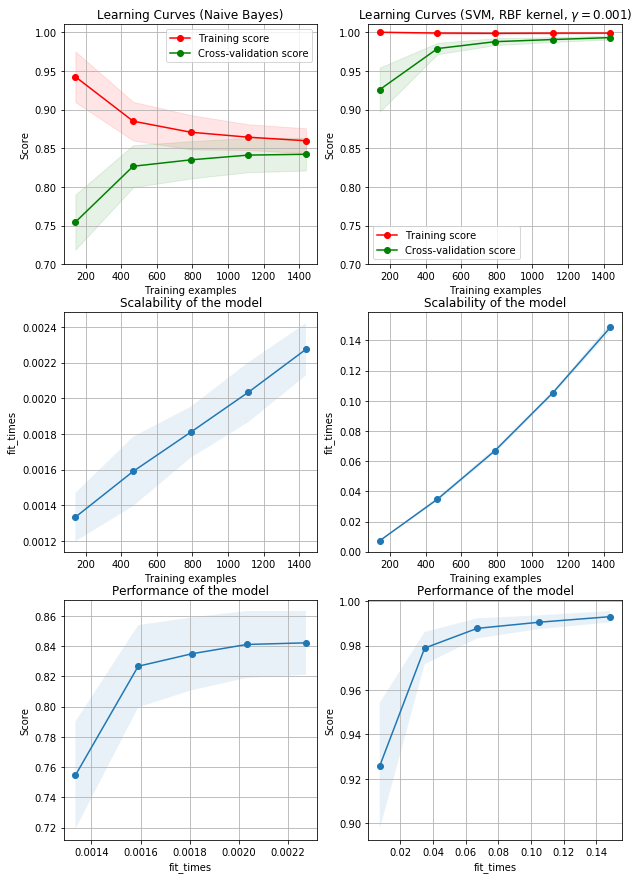

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

# Catboost

In [42]:
# Supervised Learning med 
# Catboost (Yandex)

# Categorical features
#import numpy as np
#categorical_features = [col for c, col in enumerate(dataset.columns)
#                        if not (np.issubdtype(dataset.dtypes[c], np.number))]
#print(categorical_features)
from catboost import CatBoostClassifier, Pool
import ipywidgets # Nødvendig for plot

cb_model = CatBoostClassifier(iterations=100,
                              loss_function='Logloss',
                              #cat_features=categorical_features,
                              verbose=True) #, task_type = "GPU"



In [43]:
# Training model
cb_model.fit(X = data, 
             y = targets, 
             use_best_model = True, 
             #cat_features=categorical_features,
             plot = True)

<IPython.core.display.HTML object>
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
You should provide test set for use best model. use_best_model parameter has been switched to false value.
Learning rate set to 0.043526
0:	learn: 0.6708224	total: 2.76ms	remaining: 273ms
1:	learn: 0.6352452	total: 5.24ms	remaining: 257ms
2:	learn: 0.6051438	total: 7.66ms	remaining: 248ms
3:	learn: 0.5862215	total: 10.5ms	remaining: 251ms
4:	learn: 0.5612298	total: 13.1ms	remaining: 250ms
5:	learn: 0.5426375	total: 15.7ms	remaining: 246ms
6:	learn: 0.5234347	total: 18.3ms	remaining: 243ms
7:	learn: 0.5064149	total: 20.6ms	remaining: 237ms
8:	learn: 0.4830334	total: 23.1ms	remaining: 234ms
9:	learn: 0.4654679	total: 25.7ms	remaining: 231ms
10:	learn: 0.4496957	total: 28.4ms	remaining: 230ms
11:	learn: 0.4366169	total: 31.1ms	remaining: 228ms
12:	learn: 0.4173049	total: 33.9ms	remaining: 227ms
13:	learn: 0.4047544	total: 36.2ms	remaining: 223ms
14:	learn: 0.3878446	total: 38.5ms	remaining: 218ms
15:	learn: 0.3736487	total: 41ms	remaining: 215ms
16:	learn: 0.3618127	total: 43.3ms	remaining: 212ms
17:	learn: 0.3519081	total: 45.8ms	remaining: 208ms
18:	learn: 0.3393868	total: 48.3ms	remaining: 206ms
19:	learn: 0.3284404	total: 50.9ms	remaining: 204ms
20:	learn: 0.3198407	total: 53.5ms	remaining: 201ms
21:	learn: 0.3113856	total: 56.2ms	remaining: 199ms
22:	learn: 0.3039750	total: 60.2ms	remaining: 201ms
23:	learn: 0.2929230	total: 63ms	remaining: 199ms
24:	learn: 0.2841524	total: 65.8ms	remaining: 197ms
25:	learn: 0.2764876	total: 68.2ms	remaining: 194ms
26:	learn: 0.2680913	total: 70.6ms	remaining: 191ms
27:	learn: 0.2615522	total: 72.9ms	remaining: 188ms
28:	learn: 0.2550723	total: 75.3ms	remaining: 184ms
29:	learn: 0.2465032	total: 77.7ms	remaining: 181ms
30:	learn: 0.2420127	total: 80.1ms	remaining: 178ms
31:	learn: 0.2350915	total: 82.5ms	remaining: 175ms
32:	learn: 0.2291091	total: 84.8ms	remaining: 172ms
33:	learn: 0.2248495	total: 87.2ms	remaining: 169ms
34:	learn: 0.2196551	total: 89.6ms	remaining: 166ms
35:	learn: 0.2157138	total: 91.9ms	remaining: 163ms
36:	learn: 0.2103667	total: 94.5ms	remaining: 161ms
37:	learn: 0.2040145	total: 97.1ms	remaining: 158ms
38:	learn: 0.2001094	total: 99.5ms	remaining: 156ms
39:	learn: 0.1964334	total: 102ms	remaining: 153ms
40:	learn: 0.1920710	total: 104ms	remaining: 150ms
41:	learn: 0.1885384	total: 106ms	remaining: 147ms
42:	learn: 0.1837663	total: 109ms	remaining: 144ms
43:	learn: 0.1790271	total: 111ms	remaining: 141ms
44:	learn: 0.1750496	total: 113ms	remaining: 139ms
45:	learn: 0.1698186	total: 116ms	remaining: 136ms
46:	learn: 0.1666502	total: 118ms	remaining: 133ms
47:	learn: 0.1635033	total: 121ms	remaining: 131ms
48:	learn: 0.1606003	total: 123ms	remaining: 128ms
49:	learn: 0.1568868	total: 126ms	remaining: 126ms
50:	learn: 0.1536688	total: 128ms	remaining: 123ms
51:	learn: 0.1512494	total: 131ms	remaining: 121ms
52:	learn: 0.1478240	total: 134ms	remaining: 119ms
53:	learn: 0.1451082	total: 136ms	remaining: 116ms
54:	learn: 0.1422052	total: 139ms	remaining: 113ms
55:	learn: 0.1393653	total: 141ms	remaining: 111ms
56:	learn: 0.1361442	total: 143ms	remaining: 108ms
57:	learn: 0.1343379	total: 146ms	remaining: 106ms
58:	learn: 0.1313982	total: 148ms	remaining: 103ms
59:	learn: 0.1287634	total: 150ms	remaining: 100ms
60:	learn: 0.1260668	total: 153ms	remaining: 97.8ms
61:	learn: 0.1236430	total: 155ms	remaining: 95.2ms
62:	learn: 0.1218398	total: 158ms	remaining: 92.6ms
63:	learn: 0.1204398	total: 160ms	remaining: 90.3ms
64:	learn: 0.1173626	total: 163ms	remaining: 87.7ms
65:	learn: 0.1147106	total: 165ms	remaining: 85.2ms
66:	learn: 0.1130162	total: 168ms	remaining: 82.7ms
67:	learn: 0.1113311	total: 170ms	remaining: 80.1ms
68:	learn: 0.1094721	total: 173ms	remaining: 77.5ms
69:	learn: 0.1082953	total: 175ms	remaining: 74.9ms
70:	learn: 0.1062590	total: 177ms	remaining: 72.5ms
71:	learn: 0.1044699	total: 180ms	remaining: 70ms
72:	learn: 0.1030137	total: 183ms	remaining: 67.6ms

In [44]:
# make the prediction using the resulting model
preds_class = cb_model.predict(data, prediction_type='Class')
preds_raw_vals = cb_model.predict(data, prediction_type='RawFormulaVal')
preds_proba = cb_model.predict(data, prediction_type='Probability')

# Eller preds_proba = cb_model.predict_proba(data)
print("class = ", preds_class)
print("proba = ", preds_proba)
print("proba = ", preds_raw_vals)

class = ['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
proba = [[0.12735292 0.87264708]
 [0.10623617 0.89376383]
 [0.10887299 0.89112701]
 [0.1075696 0.8924304 ]
 [0.11131873 0.88868127]
 [0.0801468 0.9198532 ]
 [0.10819915 0.89180085]
 [0.17538489 0.82461511]
 [0.10485064 0.89514936]
 [0.02811503 0.97188497]
 [0.00932419 0.99067581]
 [0.05342539 0.94657461]
 [0.10928127 0.89071873]
 [0.07075204 0.92924796]
 [0.08925157 0.91074843]
 [0.08030733 0.91969267]
 [0.14521854 0.85478146]
 [0.12239981 0.87760019]
 [0.03102019 0.96897981]
 [0.1741143 0.8258857 ]
 [0.124775 0.875225 ]
 [0.12522753 0.87477247]
 [0.09117804 0.90882196]
 [0.03423972 0.96576028]
 [0.03728043 0.96271957]
 [0.02926227 0.97073773]
 [0.0882969 0.9117031 ]
 [0.08271763 0.91728237]
 [0.13768958 0.86231042]
 [0.12889061 0.87110939]
 [0.07697805 0.92302195]
 [0.04749737 0.95250263]
 [0.08811635 0.91188365]
 [0.12895308 0.87104692]
 [0.11107067 0.88892933]
 [0.13199272 0.86800728]
 [0.02284687 0.97715313]
 [0.02517866 0.97482134]
 [0.03634557 0.96365443]
 [0.02617275 0.97382725]
 [0.05638543 0.94361457]
 [0.00649061 0.99350939]
 [0.03197465 0.96802535]
 [0.05893269 0.94106731]
 [0.08812338 0.91187662]
 [0.09897466 0.90102534]
 [0.08993359 0.91006641]
 [0.06946217 0.93053783]
 [0.08346184 0.91653816]
 [0.10010505 0.89989495]
 [0.04836886 0.95163114]
 [0.01191899 0.98808101]
 [0.03086633 0.96913367]
 [0.02881435 0.97118565]
 [0.03721371 0.96278629]
 [0.0879629 0.9120371 ]
 [0.11415848 0.88584152]
 [0.01746942 0.98253058]
 [0.0243563 0.9756437 ]
 [0.01859434 0.98140566]
 [0.03046767 0.96953233]
 [0.04974439 0.95025561]
 [0.03243173 0.96756827]
 [0.0134881 0.9865119 ]
 [0.01534825 0.98465175]
 [0.01914898 0.98085102]
 [0.02292734 0.97707266]
 [0.02727262 0.97272738]
 [0.0278959 0.9721041 ]
 [0.02900685 0.97099315]
 [0.01834315 0.98165685]
 [0.02776398 0.97223602]
 [0.02425285 0.97574715]
 [0.04011531 0.95988469]
 [0.05000691 0.94999309]
 [0.07192516 0.92807484]
 [0.06061084 0.93938916]
 [0.09950307 0.90049693]
 [0.08117529 0.91882471]
 [0.06047894 0.93952106]
 [0.11731254 0.88268746]
 [0.13154352 0.86845648]
 [0.08715989 0.91284011]
 [0.08896481 0.91103519]
 [0.08716387 0.91283613]
 [0.07498487 0.92501513]
 [0.0593852 0.9406148 ]
 [0.08799305 0.91200695]
 [0.11490392 0.88509608]
 [0.05461517 0.94538483]
 [0.04364297 0.95635703]
 [0.10352312 0.89647688]
 [0.074084 0.925916 ]
 [0.12393501 0.87606499]
 [0.06169855 0.93830145]
 [0.05097561 0.94902439]
 [0.03958163 0.96041837]
 [0.87419993 0.12580007]
 [0.93700232 0.06299768]
 [0.93417635 0.06582365]
 [0.92567415 0.07432585]
 [0.907721 0.092279 ]
 [0.94215803 0.05784197]
 [0.85922323 0.14077677]
 [0.89851974 0.10148026]
 [0.91415185 0.08584815]
 [0.90437104 0.09562896]
 [0.91700645 0.08299355]
 [0.88155696 0.11844304]
 [0.91534453 0.08465547]
 [0.91458753 0.08541247]
 [0.95205486 0.04794514]
 [0.95668294 0.04331706]
 [0.92530409 0.07469591]
 [0.96214809 0.03785191]
 [0.94187623 0.05812377]
 [0.96426265 0.03573735]
 [0.97731631 0.02268369]
 [0.94249946 0.05750054]
 [0.94513691 0.05486309]
 [0.91610646 0.08389354]
 [0.96583569 0.03416431]
 [0.95529331 0.04470669]
 [0.97289755 0.02710245]
 [0.9561788 0.0438212 ]
 [0.96420419 0.03579581]
 [0.9283

# Bayesian Optimization using skopt

In [46]:
# Model selection
# Reference: https://www.kaggle.com/shivampanwar/catboost-and-hyperparameter-tuning-using-bayes
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

In [47]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    import pandas as pd
    import pprint
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

roc_auc = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [48]:
clf = CatBoostClassifier(thread_count=2,
                         loss_function='Logloss',
                         od_type = 'Iter',
                         verbose= True)

In [49]:
# Defining Catboost search space
search_spaces = {'iterations': (10, 1000),
                 'depth': (1, 8),
                 #'learning_rate': (0.01, 1.0, 'log-uniform'),
                 'learning_rate': (0.01, 1.0),
                 #'random_strength': (1e-9, 10, 'log-uniform'),
                 'random_strength': (1e-9, 10),
                 'bagging_temperature': (0.0, 1.0),
                 'border_count': (1, 255),
                 'l2_leaf_reg': (2, 30),
                 #'scale_pos_weight':(0.01, 1.0, 'uniform')}
                 'scale_pos_weight':(0.01, 1.0)}

In [50]:
# Setting up BayesSearchCV
opt = BayesSearchCV(estimator=clf, 
                    search_spaces=search_spaces,
                    scoring=roc_auc,
                    cv=skf,
                    n_iter=10,
                    n_jobs=1,  # use just 1 job with CatBoost in order to avoid segmentation fault
                    return_train_score=False,
                    refit=True,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=42)

In [51]:
# Execute bayesian 
best_params = report_perf(optimizer = opt, 
                          X = X, 
                          y = y, 
                          title = 'CatBoost', 
                          callbacks=[VerboseCallback(100), DeadlineStopper(60*10)])


Iteration No: 1 started. Searching for the next optimal point.
0:	learn: 0.6224640	total: 19.5ms	remaining: 6.28s
1:	learn: 0.5408557	total: 38ms	remaining: 6.1s
2:	learn: 0.4891301	total: 57.5ms	remaining: 6.13s
3:	learn: 0.4520745	total: 76.1ms	remaining: 6.07s
4:	learn: 0.4202517	total: 96ms	remaining: 6.11s
5:	learn: 0.3845715	total: 116ms	remaining: 6.11s
6:	learn: 0.3513865	total: 135ms	remaining: 6.1s
7:	learn: 0.3282599	total: 154ms	remaining: 6.06s
8:	learn: 0.3075466	total: 173ms	remaining: 6.04s
9:	learn: 0.2873649	total: 192ms	remaining: 6.02s
10:	learn: 0.2613265	total: 212ms	remaining: 6.01s
11:	learn: 0.2466329	total: 231ms	remaining: 5.99s
12:	learn: 0.2300726	total: 251ms	remaining: 5.98s
13:	learn: 0.2108232	total: 270ms	remaining: 5.96s
14:	learn: 0.1954086	total: 290ms	remaining: 5.95s
15:	learn: 0.1821313	total: 309ms	remaining: 5.93s
16:	learn: 0.1715362	total: 329ms	remaining: 5.92s
17:	learn: 0.1629931	total: 348ms	remaining: 5.9s
18:	learn: 0.1552941	total: 367ms	remaining: 5.88s
19:	learn: 0.1474413	total: 387ms	remaining: 5.87s
20:	learn: 0.1395579	total: 406ms	remaining: 5.84s
21:	learn: 0.1312937	total: 426ms	remaining: 5.82s
22:	learn: 0.1255993	total: 445ms	remaining: 5.81s
23:	learn: 0.1196711	total: 465ms	remaining: 5.8s
24:	learn: 0.1135263	total: 485ms	remaining: 5.78s
25:	learn: 0.1085169	total: 503ms	remaining: 5.75s
26:	learn: 0.1025085	total: 522ms	remaining: 5.72s
27:	learn: 0.0978901	total: 540ms	remaining: 5.69s
28:	learn: 0.0927988	total: 559ms	remaining: 5.67s
29:	learn: 0.0889406	total: 579ms	remaining: 5.65s
30:	learn: 0.0863514	total: 598ms	remaining: 5.63s
31:	learn: 0.0831646	total: 616ms	remaining: 5.61s
32:	learn: 0.0806564	total: 636ms	remaining: 5.58s
33:	learn: 0.0777670	total: 655ms	remaining: 5.57s
34:	learn: 0.0753205	total: 674ms	remaining: 5.55s
35:	learn: 0.0732751	total: 694ms	remaining: 5.53s
36:	learn: 0.0710486	total: 713ms	remaining: 5.51s
37:	learn: 0.0688133	total: 732ms	remaining: 5.49s
38:	learn: 0.0666823	total: 750ms	remaining: 5.46s
39:	learn: 0.0649226	total: 770ms	remaining: 5.45s
40:	learn: 0.0631268	total: 791ms	remaining: 5.44s
41:	learn: 0.0614896	total: 809ms	remaining: 5.42s
42:	learn: 0.0596855	total: 828ms	remaining: 5.39s
43:	learn: 0.0577903	total: 848ms	remaining: 5.38s
44:	learn: 0.0564183	total: 867ms	remaining: 5.36s
45:	learn: 0.0551863	total: 887ms	remaining: 5.34s
46:	learn: 0.0535590	total: 906ms	remaining: 5.32s
47:	learn: 0.0516229	total: 925ms	remaining: 5.3s
48:	learn: 0.0500920	total: 945ms	remaining: 5.28s
49:	learn: 0.0490549	total: 964ms	remaining: 5.26s
50:	learn: 0.0479182	total: 983ms	remaining: 5.24s
51:	learn: 0.0467226	total: 1s	remaining: 5.22s
52:	learn: 0.0458623	total: 1.02s	remaining: 5.22s
53:	learn: 0.0449080	total: 1.05s	remaining: 5.22s
54:	learn: 0.0440237	total: 1.07s	remaining: 5.21s
55:	learn: 0.0430875	total: 1.09s	remaining: 5.19s
56:	learn: 0.0421720	total: 1.11s	remaining: 5.17s
57:	learn: 0.0413066	total: 1.13s	remaining: 5.16s
58:	learn: 0.0404737	total: 1.15s	remaining: 5.14s
59:	learn: 0.0398645	total: 1.17s	remaining: 5.12s
60:	learn: 0.0389975	total: 1.19s	remaining: 5.1s
61:	learn: 0.0384308	total: 1.21s	remaining: 5.09s
62:	learn: 0.0376338	total: 1.23s	remaining: 5.08s
63:	learn: 0.0369919	total: 1.25s	remaining: 5.07s
64:	learn: 0.0364211	total: 1.27s	remaining: 5.05s
65:	learn: 0.0355183	total: 1.29s	remaining: 5.03s
66:	learn: 0.0349739	total: 1.31s	remaining: 5.01s
67:	learn: 0.0345339	total: 1.33s	remaining: 5s
68:	learn: 0.0338837	total: 1.35s	remaining: 4.98s
69:	learn: 0.0332061	total: 1.38s	remaining: 5s
70:	learn: 0.0327598	total: 1.4s	remaining: 4.99s
71:	learn: 0.0322881	total: 1.42s	remaining: 4.96s
72:	learn: 0.0318371	total: 1.44s	remaining: 4.95s
73:	learn: 0.0313162	total: 1.46s	remaining: 4.92s
74:	learn: 0.0307596	total: 1.48s	remaining: 4.9s
75:	learn: 0.0303964	total: 1.5s	remaining: 4.88s
76:	learn: 0.0300362	total: 1.52s	remaining: 4.87s
77:	learn: 0.0295494	total: 1.54s	rem

In [52]:
# Convert ordered dictionary to dictionary
import json
best_params_bayesian = json.loads(json.dumps(best_params))


In [53]:
# Manuelt
best_params={'bagging_temperature': 0.41010395885331385,
 'border_count': 186,
 'depth': 8,
 'iterations': 323,
 'l2_leaf_reg': 21,
 'learning_rate': 0.0673344419215237,
 'random_strength': 3.230824361824754e-06,
 'scale_pos_weight': 0.7421091918485163}

best_params['iterations']=100
type(best_params)

Out[96]: dict

In [54]:
%%time
tuned_model = CatBoostClassifier(**best_params_bayesian, # **best_params, 
                                 task_type = "CPU", 
                                 od_type='Iter', 
                                 one_hot_max_size=10)
tuned_model.fit(X = data, 
             y = targets)

0:	learn: 0.6748808	total: 7.6ms	remaining: 753ms
1:	learn: 0.6608857	total: 15ms	remaining: 735ms
2:	learn: 0.6443896	total: 24ms	remaining: 776ms
3:	learn: 0.6272424	total: 31.6ms	remaining: 759ms
4:	learn: 0.6118735	total: 39.6ms	remaining: 753ms
5:	learn: 0.5970957	total: 45.9ms	remaining: 719ms
6:	learn: 0.5797041	total: 52.7ms	remaining: 700ms
7:	learn: 0.5662877	total: 59.4ms	remaining: 683ms
8:	learn: 0.5548082	total: 66ms	remaining: 667ms
9:	learn: 0.5401015	total: 73.1ms	remaining: 658ms
10:	learn: 0.5303003	total: 80.2ms	remaining: 649ms
11:	learn: 0.5154521	total: 87.3ms	remaining: 640ms
12:	learn: 0.5033382	total: 94.5ms	remaining: 632ms
13:	learn: 0.4899716	total: 101ms	remaining: 622ms
14:	learn: 0.4746877	total: 108ms	remaining: 613ms
15:	learn: 0.4642397	total: 115ms	remaining: 605ms
16:	learn: 0.4553843	total: 123ms	remaining: 599ms
17:	learn: 0.4460983	total: 130ms	remaining: 592ms
18:	learn: 0.4382991	total: 136ms	remaining: 582ms
19:	learn: 0.4237526	total: 143ms	remaining: 573ms
20:	learn: 0.4152223	total: 150ms	remaining: 565ms
21:	learn: 0.4081465	total: 158ms	remaining: 562ms
22:	learn: 0.3996522	total: 165ms	remaining: 553ms
23:	learn: 0.3935620	total: 172ms	remaining: 543ms
24:	learn: 0.3857150	total: 178ms	remaining: 534ms
25:	learn: 0.3797431	total: 184ms	remaining: 524ms
26:	learn: 0.3736527	total: 194ms	remaining: 526ms
27:	learn: 0.3666545	total: 202ms	remaining: 520ms
28:	learn: 0.3603684	total: 209ms	remaining: 511ms
29:	learn: 0.3539512	total: 215ms	remaining: 503ms
30:	learn: 0.3491521	total: 221ms	remaining: 493ms
31:	learn: 0.3416953	total: 229ms	remaining: 486ms
32:	learn: 0.3353916	total: 235ms	remaining: 478ms
33:	learn: 0.3305073	total: 242ms	remaining: 469ms
34:	learn: 0.3263327	total: 248ms	remaining: 460ms
35:	learn: 0.3209184	total: 254ms	remaining: 452ms
36:	learn: 0.3156718	total: 261ms	remaining: 444ms
37:	learn: 0.3099765	total: 268ms	remaining: 437ms
38:	learn: 0.3050478	total: 274ms	remaining: 429ms
39:	learn: 0.3016950	total: 281ms	remaining: 421ms
40:	learn: 0.2974133	total: 287ms	remaining: 413ms
41:	learn: 0.2935490	total: 293ms	remaining: 405ms
42:	learn: 0.2897353	total: 300ms	remaining: 398ms
43:	learn: 0.2855664	total: 306ms	remaining: 390ms
44:	learn: 0.2814730	total: 313ms	remaining: 382ms
45:	learn: 0.2775058	total: 319ms	remaining: 375ms
46:	learn: 0.2730340	total: 326ms	remaining: 367ms
47:	learn: 0.2689116	total: 332ms	remaining: 360ms
48:	learn: 0.2658819	total: 339ms	remaining: 352ms
49:	learn: 0.2619279	total: 346ms	remaining: 346ms
50:	learn: 0.2561811	total: 353ms	remaining: 340ms
51:	learn: 0.2529213	total: 360ms	remaining: 333ms
52:	learn: 0.2499396	total: 368ms	remaining: 326ms
53:	learn: 0.2464702	total: 374ms	remaining: 319ms
54:	learn: 0.2433371	total: 381ms	remaining: 311ms
55:	learn: 0.2391204	total: 387ms	remaining: 304ms
56:	learn: 0.2355039	total: 393ms	remaining: 297ms
57:	learn: 0.2320231	total: 400ms	remaining: 290ms
58:	learn: 0.2296055	total: 407ms	remaining: 283ms
59:	learn: 0.2269373	total: 414ms	remaining: 276ms
60:	learn: 0.2233176	total: 421ms	remaining: 269ms
61:	learn: 0.2207744	total: 428ms	remaining: 262ms
62:	learn: 0.2180355	total: 434ms	remaining: 255ms
63:	learn: 0.2150735	total: 440ms	remaining: 248ms
64:	learn: 0.2127708	total: 447ms	remaining: 241ms
65:	learn: 0.2093852	total: 454ms	remaining: 234ms
66:	learn: 0.2068258	total: 460ms	remaining: 227ms
67:	learn: 0.2047335	total: 468ms	remaining: 220ms
68:	learn: 0.2021621	total: 476ms	remaining: 214ms
69:	learn: 0.1999234	total: 482ms	remaining: 207ms
70:	learn: 0.1977374	total: 489ms	remaining: 200ms
71:	learn: 0.1956652	total: 495ms	remaining: 192ms
72:	learn: 0.1935930	total: 502ms	remaining: 186ms
73:	learn: 0.1912623	total: 508ms	remaining: 178ms
74:	learn: 0.1892555	total: 515ms	remaining: 172ms
75:	learn: 0.1869208	total: 521ms	remaining: 164ms
76:	learn: 0.1849163	total: 527ms	remaining: 158ms
77:	learn: 0.1824480	total: 535ms	remaining: 151ms
78:	learn: 0.1803085	total

In [55]:
# make the prediction using the resulting model
preds_class = tuned_model.predict(data, prediction_type='Class')
preds_raw_vals = tuned_model.predict(data, prediction_type='RawFormulaVal')
preds_proba = tuned_model.predict(data, prediction_type='Probability')

# Eller preds_proba = cb_model.predict_proba(data)
print("class = ", preds_class)
print("proba = ", preds_proba)
print("proba = ", preds_raw_vals)

class = ['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
proba = [[0.1797986 0.8202014 ]
 [0.19623005 0.80376995]
 [0.21658597 0.78341403]
 [0.20382785 0.79617215]
 [0.19875953 0.80124047]
 [0.17441076 0.82558924]
 [0.22373935 0.77626065]
 [0.22137721 0.77862279]
 [0.18335222 0.81664778]
 [0.12619034 0.87380966]
 [0.08370669 0.91629331]
 [0.15569237 0.84430763]
 [0.16517839 0.83482161]
 [0.15607386 0.84392614]
 [0.15491304 0.84508696]
 [0.18542353 0.81457647]
 [0.21512119 0.78487881]
 [0.18970894 0.81029106]
 [0.15938583 0.84061417]
 [0.277506 0.722494 ]
 [0.2393382 0.7606618 ]
 [0.19698098 0.80301902]
 [0.17834751 0.82165249]
 [0.13211074 0.86788926]
 [0.12465914 0.87534086]
 [0.11247359 0.88752641]
 [0.22688869 0.77311131]
 [0.18788693 0.81211307]
 [0.1888653 0.8111347 ]
 [0.21935355 0.78064645]
 [0.17832149 0.82167851]
 [0.14927833 0.85072167]
 [0.17787749 0.82212251]
 [0.19622273 0.80377727]
 [0.20472119 0.79527881]
 [0.25861442 0.74138558]
 [0.12424697 0.87575303]
 [0.09958884 0.90041116]
 [0.10621523 0.89378477]
 [0.09731801 0.90268199]
 [0.1589237 0.8410763 ]
 [0.07834007 0.92165993]
 [0.1444451 0.8555549 ]
 [0.18100487 0.81899513]
 [0.1529144 0.8470856 ]
 [0.19615854 0.80384146]
 [0.19794247 0.80205753]
 [0.19478631 0.80521369]
 [0.20304439 0.79695561]
 [0.19914636 0.80085364]
 [0.12640066 0.87359934]
 [0.09247915 0.90752085]
 [0.11809455 0.88190545]
 [0.10011976 0.89988024]
 [0.11074682 0.88925318]
 [0.17963153 0.82036847]
 [0.19286975 0.80713025]
 [0.11429945 0.88570055]
 [0.08480618 0.91519382]
 [0.0802658 0.9197342 ]
 [0.09623133 0.90376867]
 [0.11556749 0.88443251]
 [0.10104174 0.89895826]
 [0.09600531 0.90399469]
 [0.11514015 0.88485985]
 [0.10088717 0.89911283]
 [0.0951503 0.9048497 ]
 [0.1093225 0.8906775 ]
 [0.11874555 0.88125445]
 [0.09005039 0.90994961]
 [0.08419365 0.91580635]
 [0.09881858 0.90118142]
 [0.102777 0.897223 ]
 [0.13840932 0.86159068]
 [0.17071981 0.82928019]
 [0.15251365 0.84748635]
 [0.13475714 0.86524286]
 [0.19912521 0.80087479]
 [0.15091554 0.84908446]
 [0.15178738 0.84821262]
 [0.20093934 0.79906066]
 [0.2049362 0.7950638 ]
 [0.18546243 0.81453757]
 [0.14846069 0.85153931]
 [0.16341407 0.83658593]
 [0.17440202 0.82559798]
 [0.15040231 0.84959769]
 [0.17943846 0.82056154]
 [0.17292285 0.82707715]
 [0.1522059 0.8477941 ]
 [0.18953261 0.81046739]
 [0.18655029 0.81344971]
 [0.16936528 0.83063472]
 [0.22080629 0.77919371]
 [0.17072462 0.82927538]
 [0.15050653 0.84949347]
 [0.13824908 0.86175092]
 [0.83105078 0.16894922]
 [0.8625075 0.1374925 ]
 [0.85459281 0.14540719]
 [0.84614501 0.15385499]
 [0.87798858 0.12201142]
 [0.88094739 0.11905261]
 [0.85408502 0.14591498]
 [0.85349523 0.14650477]
 [0.86590111 0.13409889]
 [0.84313407 0.15686593]
 [0.87694424 0.12305576]
 [0.86638173 0.13361827]
 [0.8335186 0.1664814 ]
 [0.87045561 0.12954439]
 [0.86925191 0.13074809]
 [0.88472737 0.11527263]
 [0.88195821 0.11804179]
 [0.89667732 0.10332268]
 [0.87853954 0.12146046]
 [0.90769114 0.09230886]
 [0.90162733 0.09837267]
 [0.87415254 0.12584746]
 [0.90290292 0.09709708]
 [0.87123766 0.12876234]
 [0.90580009 0.09419991]
 [0.90539341 0.09460659]
 [0.91660892 0.08339108]
 [0.89858193 0.10141807]
 [0.8821365 0.1178635 ]
 [0.89073

In [56]:
# Let's look at a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y, y_pred = preds_class)


--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-163357335389678> in <module> 
 1 # Let's look at a confusion matrix 
 2 from sklearn . metrics import confusion_matrix
 ----> 3 confusion_matrix ( y_true = y , y_pred = preds_class ) 

 /databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py in inner_f (*args, **kwargs) 
 70 FutureWarning)
 71 kwargs . update ( { k : arg for k , arg in zip ( sig . parameters , args ) } ) 
 ---> 72 return f ( ** kwargs ) 
 73 return inner_f
 74 

 /databricks/python/lib/python3.7/site-packages/sklearn/metrics/_classification.py in confusion_matrix (y_true, y_pred, labels, sample_weight, normalize) 
 274 
 275 """
 --> 276 y_type , y_true , y_pred = _check_targets ( y_true , y_pred ) 
 277 if y_type not in ( "binary" , "multiclass" ) : 
 278 raise ValueError ( "%s is not supported" % y_type ) 

 /databricks/python/lib/python3.7/site-packages/sklearn/metrics/_classification.py in _check_targets (y_true, y_pred) 
 79 y_pred : array or indicator matrix
 80 """
 ---> 81 check_consistent_length ( y_true , y_pred ) 
 82 type_true = type_of_target ( y_true ) 
 83 type_pred = type_of_target ( y_pred ) 

 /databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py in check_consistent_length (*arrays) 
 254 if len ( uniques ) > 1 : 
 255 raise ValueError("Found input variables with inconsistent numbers of"
 --> 256 " samples: %r" % [int(l) for l in lengths])
 257 
 258 

 ValueError : Found input variables with inconsistent numbers of samples: [1797, 208]

In [57]:
data.

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-163357335389679> in <module> 
 ----> 1 data . data ( ) 

 TypeError : 'memoryview' object is not callable